In [15]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/preprocessed_train_dataset.csv')
test_data = pd.read_csv('/content/drive/MyDrive/preprocessed_test_dataset.csv')

In [16]:
# Preprocessing Steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = train_data.drop('IncidentGrade', axis=1)  # Replace 'target_column' with the target variable
y = train_data['IncidentGrade']



# Assuming data is preprocessed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features (excluding non-numeric columns)
scaler = StandardScaler()

# Select only the numeric columns for scaling
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_val_numeric = X_val.select_dtypes(include=['int64', 'float64'])

# Apply scaling only on numeric columns
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_valid_scaled = scaler.transform(X_val_numeric)

# Replace the scaled numeric columns back into the original DataFrame
X_train[X_train_numeric.columns] = X_train_scaled
X_val[X_val_numeric.columns] = X_valid_scaled




In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, classification_report, confusion_matrix



**Comparing Models which perform well (Logistic Regression ,Random Forest ,XGBoost)**

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/preprocessed_train_dataset.csv")  # Replace with your train.csv file path

# Step 1: Data Splitting
X = df.drop('IncidentGrade', axis=1)  # Replace 'IncidentGrade' with your actual target column if different
y = df['IncidentGrade']

# Train-validation split with stratification
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle categorical columns by encoding them
categorical_columns = X_train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_valid[col] = label_encoder.transform(X_valid[col])

# Step 2: Standardize the numerical features
scaler = StandardScaler()

# Select numeric columns
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_valid_numeric = X_valid.select_dtypes(include=['int64', 'float64'])

# Scale numeric columns
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Replace scaled columns back into the original DataFrames
X_train[X_train_numeric.columns] = X_train_scaled
X_valid[X_valid_numeric.columns] = X_valid_scaled

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Function to evaluate model performance
def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    precision = precision_score(y_valid, y_pred, average='macro')
    recall = recall_score(y_valid, y_pred, average='macro')
    f1 = f1_score(y_valid, y_pred, average='macro')

    print("\nClassification Report:")
    print(classification_report(y_valid, y_pred))
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_valid, y_pred))
    return f1

# Step 3: Logistic Regression
print("Training Logistic Regression...")
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)
print("\nLogistic Regression Performance:")
f1_logistic = evaluate_model(logistic_model, X_valid, y_valid)

# Step 4: Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
print("\nRandom Forest Performance:")
f1_rf = evaluate_model(rf_model, X_valid, y_valid)

# Step 5: XGBoost
print("\nTraining XGBoost...")
xgb_model = XGBClassifier(tree_method='hist', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
print("\nXGBoost Performance:")
f1_xgb = evaluate_model(xgb_model, X_valid, y_valid)

# Compare models
print("\nModel Comparison:")
print(f"Logistic Regression F1 Score: {f1_logistic:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")



Training Logistic Regression...

Logistic Regression Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54     80517
           1       0.37      0.61      0.46     44451
           2       0.84      0.73      0.78    134521

    accuracy                           0.64    259489
   macro avg       0.60      0.61      0.59    259489
weighted avg       0.68      0.64      0.65    259489

Precision: 0.5988, Recall: 0.6135, F1 Score: 0.5938

Confusion Matrix:
[[40346 27049 13122]
 [11573 26916  5962]
 [16076 19740 98705]]

Training Random Forest...

Random Forest Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     80517
           1       0.98      0.98      0.98     44451
           2       1.00      0.98      0.99    134521

    accuracy                           0.98    259489
   macro avg       0.98      0.98      0.98

** Feature Importance Analysis**

<ipython-input-20-3b2257df7036>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


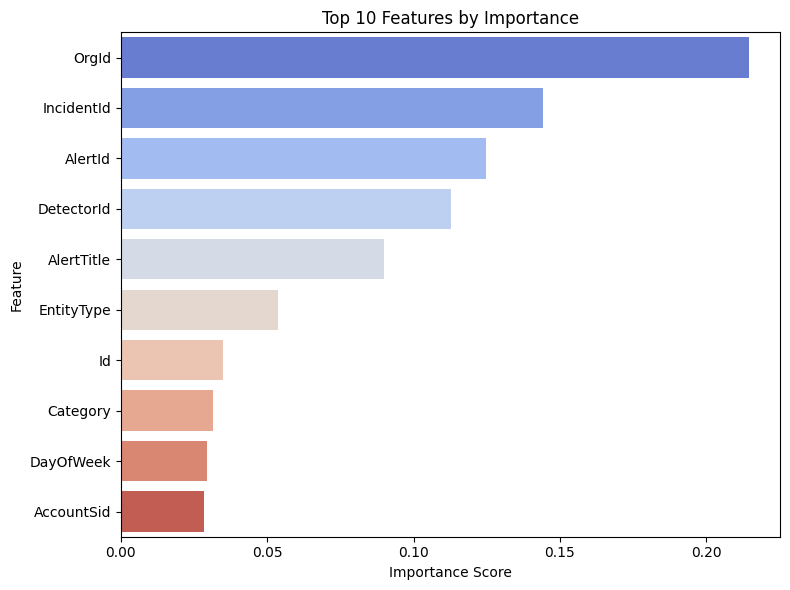

First 5 Misclassified Samples:
         Unnamed: 0        Id     OrgId  IncidentId   AlertId  DetectorId  \
289712    -1.070397  0.558592  0.308717    0.640736 -0.802895   -0.088274   
245148     0.967411 -1.436299  2.618795    0.658603 -0.635750   -0.594199   
672228     1.722956 -1.540380  1.550114    0.252739 -0.486248   -0.383397   
805967     0.322370 -0.239364  1.550114    0.231398  0.618922   -0.383397   
1088296    1.428385  0.437164  1.938725    1.263547  0.591828   -0.383397   

         AlertTitle  Category  EntityType  EvidenceRole  ...  OSVersion  \
289712    -0.152378  0.251236   -0.676338      0.915666  ...        0.0   
245148    -0.598721  0.251236    0.102137     -1.092102  ...        0.0   
672228    -0.420184  0.251236   -0.287100      0.915666  ...        0.0   
805967    -0.420184  0.251236   -0.287100      0.915666  ...        0.0   
1088296   -0.420184  0.251236   -0.676338      0.915666  ...        0.0   

         CountryCode    Year     Month  DayOfWeek      

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Feature Importance Analysis
# Get feature importances from the best Random Forest model
feature_importance_values = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for analysis
feature_analysis_df = pd.DataFrame({
    'Feature_Name': feature_names,
    'Importance_Score': feature_importance_values
})

# Sort features by importance and get the top 10
top_features = feature_analysis_df.sort_values(by='Importance_Score', ascending=False).head(10)

# Visualize the top features
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_features,
    y='Feature_Name',
    x='Importance_Score',
    palette='coolwarm'
)
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Step 2: Misclassified Samples Analysis
# Identify indices of misclassified samples

y_pred = rf_model.predict(X_valid)

misclassified_indices = y_valid != y_pred

# Extract and display misclassified rows
misclassified_data = X_valid[misclassified_indices].copy()
misclassified_data['Actual_Label'] = y_valid[misclassified_indices].values
misclassified_data['Predicted_Label'] = y_pred[misclassified_indices]

# Display insights about misclassified samples
print("First 5 Misclassified Samples:")
print(misclassified_data.head())

# Step 3: Model Evaluation
# Classification Report
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
